# Importing Libraries

In [123]:
import pandas as pd
import pandas_datareader.data as pdr
import datetime as dt

# Installing datetime

In [124]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


# Importing datetime

In [121]:
>>> import datetime

In [122]:
start = datetime.date(2021,12,2)
end = datetime.date(2022,12,1)
df = pdr.DataReader('SHIB-USD','yahoo',start,end)

# Uploading csv file

In [125]:
data = pd.read_csv("C:\SHIB-USD.csv")

In [126]:
df.describe

<bound method NDFrame.describe of                 High       Low      Open     Close      Volume  Adj Close
Date                                                                     
2021-12-01  0.000049  0.000044  0.000047  0.000044  3482541861   0.000044
2021-12-02  0.000044  0.000041  0.000044  0.000042  2042872233   0.000042
2021-12-03  0.000045  0.000040  0.000042  0.000040  2740977676   0.000040
2021-12-04  0.000041  0.000030  0.000041  0.000037  3873494147   0.000037
2021-12-05  0.000038  0.000034  0.000036  0.000036  2307804650   0.000036
...              ...       ...       ...       ...         ...        ...
2022-11-27  0.000010  0.000009  0.000009  0.000009   205943656   0.000009
2022-11-28  0.000009  0.000009  0.000009  0.000009   163217983   0.000009
2022-11-29  0.000009  0.000009  0.000009  0.000009   131355967   0.000009
2022-11-30  0.000009  0.000009  0.000009  0.000009   183097116   0.000009
2022-12-01  0.000009  0.000009  0.000009  0.000009   111818634   0.000009

[36

In [1]:
import plotly.offline as py
import plotly.graph_objs as go

In [2]:
py.init_notebook_mode(connected=True)

In [5]:
data = [go.Candlestick(x=df.index,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)]

NameError: name 'df' is not defined

In [6]:
layout = go.Layout(title='SHIB-USB Candlestick with Range Slider',
                   xaxis={'rangeslider':{'visible':True}})

# Plotting graph

In [7]:
fig = go.Figure(data=data,layout=layout)
py.iplot(fig,filename='SHIB-USD_candlestick')


NameError: name 'data' is not defined

# Performing Binomial Method

In [8]:
from __future__ import print_function, division

%matplotlib inline
%precision 6

import matplotlib.pyplot as plt

import numpy as np

In [9]:
from inspect import getsourcelines

def show_code(func):
    lines, _ = getsourcelines(func)
    for line in lines:
        print(line, end='')

In [104]:
class Pmf:
    
    def __init__(self, e=None):
        """Initializes the distribution.

        d: map from values to probabilities
        """
        self.d = {} if e is None else e

    def items(self):
        """Returns a sequence of (value, prob) pairs."""
        return self.e.items()
    
    def __repr__(self):
        """Returns a string representation of the object."""
        cls = self.__class__.__name__
        return '%s(%s)' % (cls, repr(self.e))

    def __getitem__(self, value):
        """Looks up the probability of a value."""
        return self.d.get(value, 0)

    def __setitem__(self, value, prob):
        """Sets the probability associated with a value."""
        self.e[value] = prob

    def __add__(self, other):
        """Computes the Pmf of the sum of values drawn from self and other.

        other: another Pmf or a scalar

        returns: new Pmf
        """
        if other == 0:
            return self

        pmf = Pmf()
        for v1, p1 in self.items():
            for v2, p2 in other.items():
                pmf[v1 + v2] += p1 * p2
        return pmf
    
    __radd__ = __add__

    def total(self):
        """Returns the total of the probabilities."""
        return sum(self.d.values())

    def normalize(self):
        """Normalizes this PMF so the sum of all probs is 1.

        Args:
            fraction: what the total should be after normalization

        Returns: the total probability before normalizing
        """
        total = self.total()
        for x in self.d:
            self.d[x] /= total
        return total
    
    def mean(self):
        """Computes the mean of a PMF."""
        return sum(p * x for x, p in self.items())

    def var(self, mu=None):
        """Computes the variance of a PMF.

        mu: the point around which the variance is computed;
                if omitted, computes the mean
        """
        if mu is None:
            mu = self.mean()

        return sum(p * (x - mu) ** 2 for x, p in self.items())

    def expect(self, func):
        """Computes the expectation of a given function, E[f(x)]

        func: function
        """
        return sum(p * func(x) for x, p in self.items())

    def display(self):
        """Displays the values and probabilities."""
        for value, prob in self.items():
            print(value, prob)
            
    def plot_pmf(self, **options):
        """Plots the values and probabilities."""
        xs, ps = zip(*sorted(self.items()))
        plt.plot(xs, ps, **options)

In [57]:
coin = Pmf(dict(H=0.3, T=0.6))
coin.display()

H 0.3
T 0.6


In [58]:
twice = coin + coin
twice.display()


HH 0.09
HT 0.18
TH 0.18
TT 0.36


In [59]:
thrice = sum([coin]*6)
thrice.display()

HHHHHH 0.0007289999999999999
HHHHHT 0.0014579999999999999
HHHHTH 0.0014579999999999999
HHHHTT 0.0029159999999999998
HHHTHH 0.0014579999999999999
HHHTHT 0.0029159999999999998
HHHTTH 0.0029159999999999998
HHHTTT 0.0058319999999999995
HHTHHH 0.0014579999999999999
HHTHHT 0.0029159999999999998
HHTHTH 0.0029159999999999998
HHTHTT 0.0058319999999999995
HHTTHH 0.0029159999999999998
HHTTHT 0.0058319999999999995
HHTTTH 0.0058319999999999995
HHTTTT 0.011663999999999999
HTHHHH 0.0014579999999999999
HTHHHT 0.0029159999999999998
HTHHTH 0.0029159999999999998
HTHHTT 0.0058319999999999995
HTHTHH 0.0029159999999999998
HTHTHT 0.0058319999999999995
HTHTTH 0.0058319999999999995
HTHTTT 0.011663999999999999
HTTHHH 0.0029159999999999998
HTTHHT 0.0058319999999999995
HTTHTH 0.0058319999999999995
HTTHTT 0.011663999999999999
HTTTHH 0.0058319999999999995
HTTTHT 0.011663999999999999
HTTTTH 0.011663999999999999
HTTTTT 0.023327999999999998
THHHHH 0.0014579999999999999
THHHHT 0.0029159999999999998
THHHTH 0.00291599999

In [60]:
from collections import Counter

for val, prob in sorted(thrice.items()):
    heads = val.count('H')
    print(heads, prob)

6 0.0007289999999999999
5 0.0014579999999999999
5 0.0014579999999999999
4 0.0029159999999999998
5 0.0014579999999999999
4 0.0029159999999999998
4 0.0029159999999999998
3 0.0058319999999999995
5 0.0014579999999999999
4 0.0029159999999999998
4 0.0029159999999999998
3 0.0058319999999999995
4 0.0029159999999999998
3 0.0058319999999999995
3 0.0058319999999999995
2 0.011663999999999999
5 0.0014579999999999999
4 0.0029159999999999998
4 0.0029159999999999998
3 0.0058319999999999995
4 0.0029159999999999998
3 0.0058319999999999995
3 0.0058319999999999995
2 0.011663999999999999
4 0.0029159999999999998
3 0.0058319999999999995
3 0.0058319999999999995
2 0.011663999999999999
3 0.0058319999999999995
2 0.011663999999999999
2 0.011663999999999999
1 0.023327999999999998
5 0.0014579999999999999
4 0.0029159999999999998
4 0.0029159999999999998
3 0.0058319999999999995
4 0.0029159999999999998
3 0.0058319999999999995
3 0.0058319999999999995
2 0.011663999999999999
4 0.0029159999999999998
3 0.0058319999999999995

In [61]:
def make_pmf_heads(coin, n):
    coins = sum([coin]*n)
    pmf = Pmf()
    for val, prob in coins.items():
        heads = val.count('H')
        pmf[heads] += prob
    return pmf

In [62]:
pmf_heads = make_pmf_heads(coin, 6)
pmf_heads.display()

6 0.0007289999999999999
5 0.008747999999999999
4 0.04374
3 0.11664000000000002
2 0.17496
1 0.13996799999999998
0 0.046655999999999996


# Plotting graph

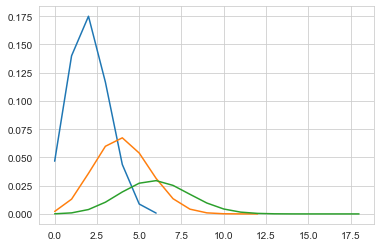

In [63]:
for n in [6, 12, 18]:
    make_pmf_heads(coin, n).plot_pmf()

Wall time: 635 ms


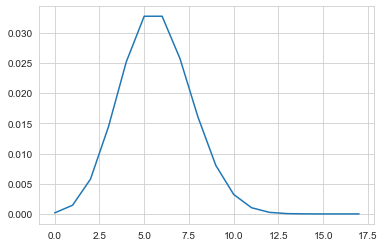

In [64]:
n = 17
%time make_pmf_heads(coin, n).plot_pmf()

In [65]:
from sympy import symbols

p = symbols('p')
sym_coin = Pmf(dict(H=p, T=1-p))
sym_coin.display()

H p
T 1 - p


In [66]:
make_pmf_heads(sym_coin, 6).display()

6 p**6
5 6*p**5*(1 - p)
4 15*p**4*(1 - p)**2
3 20*p**3*(1 - p)**3
2 15*p**2*(1 - p)**4
1 6*p*(1 - p)**5
0 (1 - p)**6


In [67]:
make_pmf_heads(sym_coin, 6).display()

6 p**6
5 6*p**5*(1 - p)
4 15*p**4*(1 - p)**2
3 20*p**3*(1 - p)**3
2 15*p**2*(1 - p)**4
1 6*p*(1 - p)**5
0 (1 - p)**6


In [68]:
make_pmf_heads(sym_coin, 7).display()

7 p**7
6 7*p**6*(1 - p)
5 21*p**5*(1 - p)**2
4 35*p**4*(1 - p)**3
3 35*p**3*(1 - p)**4
2 21*p**2*(1 - p)**5
1 7*p*(1 - p)**6
0 (1 - p)**7


In [69]:
fair_coin = Pmf(dict(H=p, T=p))
fair_coin.display()

H p
T p


In [70]:
thrice = sum([fair_coin]*6)
thrice.display()

HHHHHH p**6
HHHHHT p**6
HHHHTH p**6
HHHHTT p**6
HHHTHH p**6
HHHTHT p**6
HHHTTH p**6
HHHTTT p**6
HHTHHH p**6
HHTHHT p**6
HHTHTH p**6
HHTHTT p**6
HHTTHH p**6
HHTTHT p**6
HHTTTH p**6
HHTTTT p**6
HTHHHH p**6
HTHHHT p**6
HTHHTH p**6
HTHHTT p**6
HTHTHH p**6
HTHTHT p**6
HTHTTH p**6
HTHTTT p**6
HTTHHH p**6
HTTHHT p**6
HTTHTH p**6
HTTHTT p**6
HTTTHH p**6
HTTTHT p**6
HTTTTH p**6
HTTTTT p**6
THHHHH p**6
THHHHT p**6
THHHTH p**6
THHHTT p**6
THHTHH p**6
THHTHT p**6
THHTTH p**6
THHTTT p**6
THTHHH p**6
THTHHT p**6
THTHTH p**6
THTHTT p**6
THTTHH p**6
THTTHT p**6
THTTTH p**6
THTTTT p**6
TTHHHH p**6
TTHHHT p**6
TTHHTH p**6
TTHHTT p**6
TTHTHH p**6
TTHTHT p**6
TTHTTH p**6
TTHTTT p**6
TTTHHH p**6
TTTHHT p**6
TTTHTH p**6
TTTHTT p**6
TTTTHH p**6
TTTTHT p**6
TTTTTH p**6
TTTTTT p**6


In [71]:
pmf_heads = make_pmf_heads(fair_coin, 6)
pmf_heads.display()

6 p**6
5 6*p**6
4 15*p**6
3 20*p**6
2 15*p**6
1 6*p**6
0 p**6


In [72]:
for val, prob in pmf_heads.items():
    print(val, prob / p**6)

6 1
5 6
4 15
3 20
2 15
1 6
0 1


In [73]:
def coefficients(n):
    fair_coin = Pmf(dict(H=p, T=p))
    pmf_heads = make_pmf_heads(fair_coin, n)
    for val, prob in pmf_heads.items():
        print(prob / p**n, end=' ')
    print()

In [74]:
coefficients(6)

1 6 15 20 15 6 1 


In [75]:
for n in range(1, 16):
    coefficients(n)

1 1 
1 2 1 
1 3 3 1 
1 4 6 4 1 
1 5 10 10 5 1 
1 6 15 20 15 6 1 
1 7 21 35 35 21 7 1 
1 8 28 56 70 56 28 8 1 
1 9 36 84 126 126 84 36 9 1 
1 10 45 120 210 252 210 120 45 10 1 
1 11 55 165 330 462 462 330 165 55 11 1 
1 12 66 220 495 792 924 792 495 220 66 12 1 
1 13 78 286 715 1287 1716 1716 1287 715 286 78 13 1 
1 14 91 364 1001 2002 3003 3432 3003 2002 1001 364 91 14 1 
1 15 105 455 1365 3003 5005 6435 6435 5005 3003 1365 455 105 15 1 


In [76]:
def binomial_coefficient(n, k):
    if k==0 or k==n:
        return 1
    return binomial_coefficient(n-1, k) + binomial_coefficient(n-1, k-1)

In [77]:
from scipy.special import binom
binom(5, 7)

0.0

In [78]:
from scipy.special import binom

def eval_binomial_pmf(k, n, p):
    return binom(n, k) * p**k * (1-p)**(n-k)

In [79]:
n = 4
p = 0.2

for k in range(n+1):
    print(k, eval_binomial_pmf(k, n, p))

0 0.4096000000000001
1 0.40960000000000013
2 0.15360000000000007
3 0.025600000000000008
4 0.0016000000000000003


# Vanilla Option

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

In [101]:
avg = 2
std_dev = .2
num_reps = 600
num_simulations = 2000

In [102]:
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)


In [103]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [84]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [96]:
def calc_Requition_rate(x):
    if x <= .91:
        return .01
    if x <= .98:
        return .02
    else:
        return .06

In [105]:
df['Requition_Rate'] = df['Pct_To_Target'].apply(calc_Requition_rate)
df['Requition_Amount'] = df['Requition_Rate'] * df['Sales']

In [107]:
all_stats = []
for i in range(num_simulations):
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
    df['Requition_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Requition_Amount'] = df['Requition_Rate'] * df['Sales']
    all_stats.append([df['Sales'].sum().round(0),
                      df['Requition_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [109]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Requition_Amount',
                                                           'Sales_Target'])

In [110]:
results_df.describe().style.format('{:,}')


,Sales,Requition_Amount,Sales_Target
count,"2,000.0","2,000.0","2,000.0"
mean,"201,095,762.625","12,065,745.7575","100,542,912.5"
std,"5,916,678.422114015","355,000.70532684313","2,922,414.5125452518"
min,"181,532,750.0","10,891,965.0","91,500,000.0"
25%,"197,046,187.5","11,822,771.25","98,500,000.0"
50%,"201,074,125.0","12,064,447.5","100,575,000.0"
75%,"205,146,250.0","12,308,775.0","102,550,000.0"
max,"219,315,000.0","13,158,900.0","109,450,000.0"


In [111]:
results_df

,Sales,Requition_Amount,Sales_Target
0,192044000.0,11522640.0,95375000
1,207602250.0,12456135.0,104625000
2,194209000.0,11652540.0,97450000
3,193457750.0,11607465.0,98075000
4,194756500.0,11685390.0,96950000
...,...,...,...
1995,203325250.0,12199515.0,101325000
1996,195924250.0,11755455.0,97500000
1997,205432250.0,12325935.0,102175000
1998,198753500.0,11925210.0,99250000


# Heatmap Plotting

In [112]:
import seaborn as sns 

<AxesSubplot:>

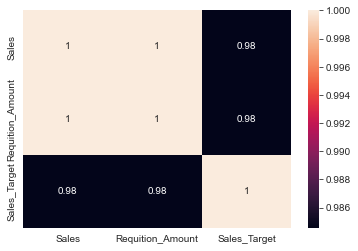

In [113]:
sns.heatmap(results_df.corr(), annot=True)

<AxesSubplot:xlabel='Sales'>

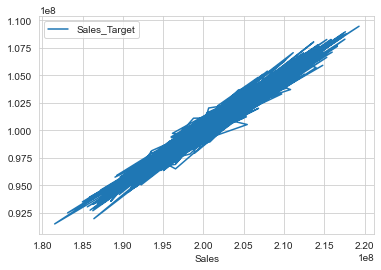

In [114]:
results_df.plot(x="Sales", y="Sales_Target")